In [3]:
library(ismev)
source("utils.R")
library(ggplot2)
library(fitdistrplus)

Warning message:
"package 'ismev' was built under R version 3.6.3"Loading required package: mgcv
Loading required package: nlme
This is mgcv 1.8-28. For overview type 'help("mgcv-package")'.
Warning message:
"package 'e1071' was built under R version 3.6.3"Warning message:
"package 'ppcc' was built under R version 3.6.3"Warning message:
"package 'FAdist' was built under R version 3.6.3"Warning message:
"package 'pracma' was built under R version 3.6.3"
Attaching package: 'pracma'

The following object is masked from 'package:e1071':

    sigmoid

The following object is masked from 'package:mgcv':

    magic



In [2]:
# remove.packages("rlang")
remove.packages("dplyr")
remove.packages("ggplot2")
install.packages("rlang")
install.packages("dplyr")
install.packages("ggplot2")

library(rlang)
library(dplyr)
library(ggplot2)

Removing package from 'C:/Users/smj5vup/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Removing package from 'C:/Users/smj5vup/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Installing package into 'C:/Users/smj5vup/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



  There is a binary version available but the source version is later:
      binary source needs_compilation
rlang 0.4.10 0.4.11              TRUE

  Binaries will be installed
package 'rlang' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\smj5vup\AppData\Local\Temp\RtmpKYGbux\downloaded_packages


Installing package into 'C:/Users/smj5vup/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
also installing the dependencies 'glue', 'tidyselect'



package 'glue' successfully unpacked and MD5 sums checked
package 'tidyselect' successfully unpacked and MD5 sums checked
package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\smj5vup\AppData\Local\Temp\RtmpKYGbux\downloaded_packages


Installing package into 'C:/Users/smj5vup/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\smj5vup\AppData\Local\Temp\RtmpKYGbux\downloaded_packages


Warning message:
"package 'rlang' was built under R version 3.6.3"

ERROR: Error in value[[3L]](cond): Package 'rlang' version 0.3.4 cannot be unloaded:
 Error in unloadNamespace(package) : namespace 'rlang' is imported by 'htmltools' so cannot be unloaded



In [2]:
library(fitdistrplus)


Warning message:
"package 'fitdistrplus' was built under R version 3.6.3"Loading required package: MASS
Loading required package: survival


In [4]:
GFDL_maxQ = read.csv('../Data/GFDL_maxQ.csv')
CCSM_maxQ = read.csv('../Data/CCSM_maxQ.csv')

In [5]:
ti = matrix(ncol=1, nrow=length(GFDL_maxQ$Year))
ti[,1] = seq(1,length(GFDL_maxQ$Year),1)

### Fit models

#### Stationary

In [5]:
GFDL_stat = gev.fit(GFDL_maxQ$Uncontrolled)
CCSM_stat = gev.fit(CCSM_maxQ$Uncontrolled)

$conv
[1] 0

$nllh
[1] 960.0192

$mle
[1] 2.110148e+03 1.112582e+03 9.437325e-02

$se
[1] 119.89927450  90.57984533   0.07654949

$conv
[1] 0

$nllh
[1] 958.3228

$mle
[1] 2.511045e+03 1.107769e+03 8.062693e-02

$se
[1] 116.83312208  86.35185673   0.06446068



#### Non-Stationary

##### Mean Only

In [6]:
GFDL_mu = gev.fit(GFDL_maxQ$Uncontrolled, ti, mul=1)

$model
$model[[1]]
[1] 1

$model[[2]]
NULL

$model[[3]]
NULL


$link
[1] "c(identity, identity, identity)"

$conv
[1] 0

$nllh
[1] 959.9906

$mle
[1] 2151.6626956   -0.9039073 1105.0964484    0.1062951

$se
[1] 210.03387705   3.77930107  96.07343463   0.09184763



In [7]:
D = 2*(-1* GFDL_mu$nllh - (-1*GFDL_stat$nllh))
print(D)

[1] 0.05727497


##### Sigma Only

$model
$model[[1]]
NULL

$model[[2]]
[1] 1

$model[[3]]
NULL


$link
[1] "c(identity, identity, identity)"

$conv
[1] 0

$nllh
[1] 946.6464

$mle
[1] 1.984560e+03 3.343471e+02 1.326844e+01 5.958865e-02

$se
[1] 89.77621168 89.33961546  2.36518718  0.08816877



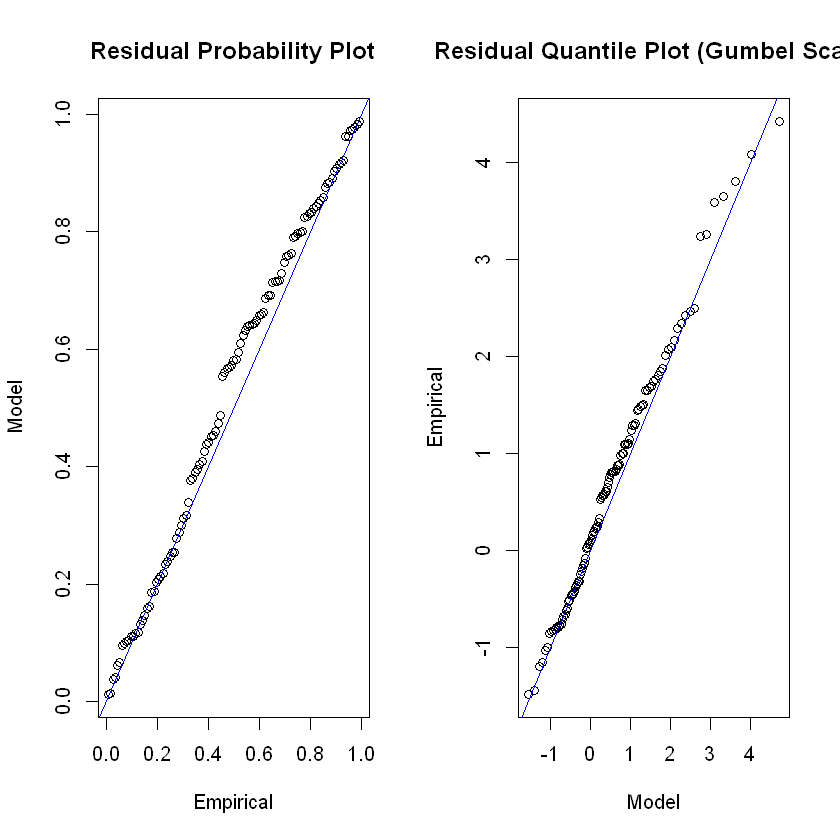

In [8]:
GFDL_sigl = gev.fit(GFDL_maxQ$Uncontrolled, ti, sigl=1)
gev.diag(GFDL_sigl)

In [9]:
D = 2*(-1* GFDL_sigl$nllh - (-1*GFDL_stat$nllh))
print(D)

[1] 26.74562


##### Shape parameter only

$model
$model[[1]]
NULL

$model[[2]]
NULL

$model[[3]]
[1] 1


$link
[1] "c(identity, identity, identity)"

$conv
[1] 0

$nllh
[1] 960.5439

$mle
[1]  2.179254e+03  1.244881e+03 -2.123711e-01  3.611651e-03

$se
[1] 1.439953e+02 1.159496e+02 2.568728e-01 3.196569e-03



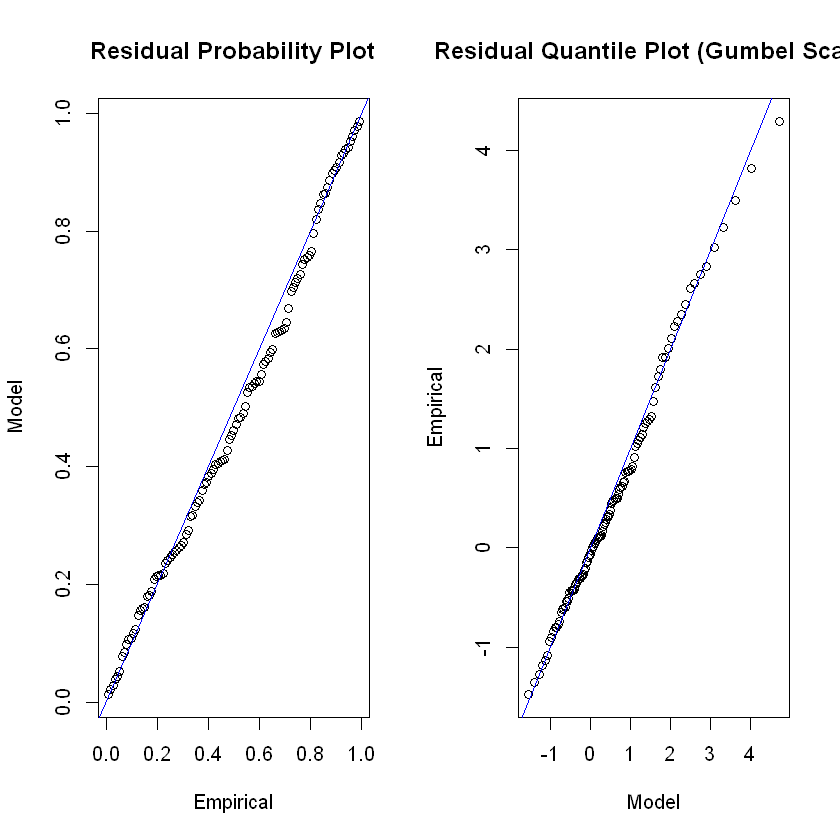

In [10]:
GFDL_shl = gev.fit(GFDL_maxQ$Uncontrolled, ti, shl=1)
gev.diag(GFDL_shl)

In [11]:
D = 2*(-1* GFDL_shl$nllh - (-1*GFDL_stat$nllh))
print(D)

[1] -1.049438


##### Mu and Sigma

$model
$model[[1]]
[1] 1

$model[[2]]
[1] 1

$model[[3]]
NULL


$link
[1] "c(identity, identity, identity)"

$conv
[1] 0

$nllh
[1] 943.6937

$mle
[1] 1.799579e+03 7.503924e+00 2.399742e+02 1.608698e+01 1.847428e-02

$se
[1] 98.81913359  3.07459826 78.95452662  2.41579919  0.08253497



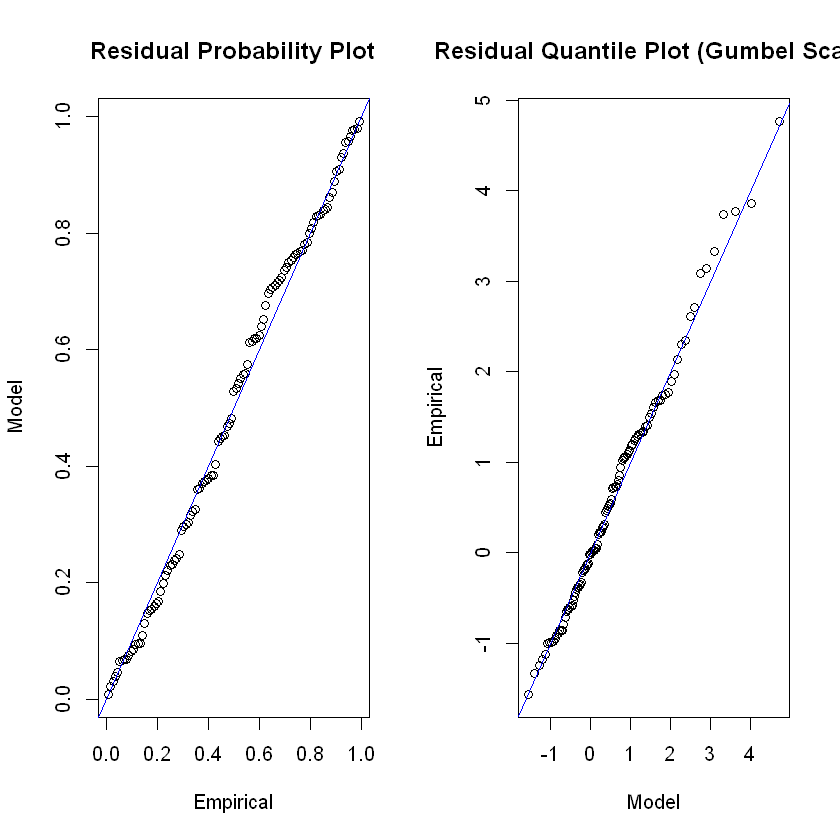

In [12]:
GFDL_mu_sigl = gev.fit(GFDL_maxQ$Uncontrolled, ti, mul=1, sigl=1)
gev.diag(GFDL_mu_sigl)

In [13]:
D = 2*(-1* GFDL_mu_sigl$nllh - (-1*GFDL_stat$nllh))
print(D)

[1] 32.651


##### All 3

Warning message in sqrt(diag(z$cov)):
"NaNs produced"

$model
$model[[1]]
[1] 1

$model[[2]]
[1] 1

$model[[3]]
[1] 1


$link
[1] "c(identity, identity, identity)"

$conv
[1] 0

$nllh
[1] 960.352

$mle
[1]  2.179532e+03  4.764641e-01  1.244104e+03  1.089916e+00 -2.128561e-01
[6]  3.346474e-03

$se
[1] 3.194807e+02 5.049361e+00          NaN          NaN 1.544807e-01
[6] 2.008725e-03



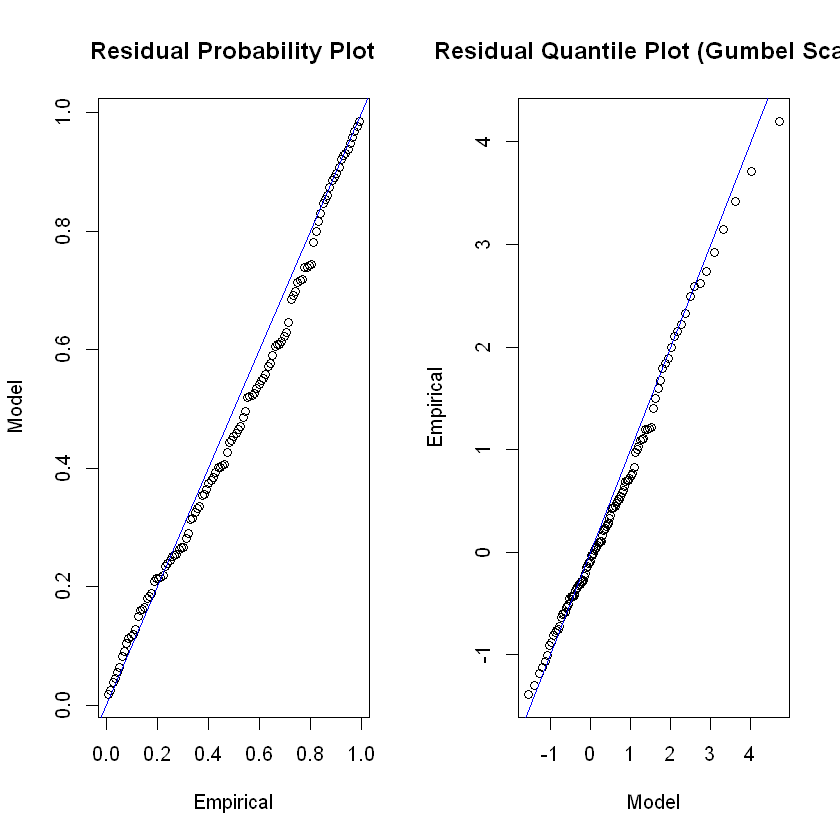

In [14]:
GFDL_mu_sigl_shl = gev.fit(GFDL_maxQ$Uncontrolled, ti, mul=1, sigl=1, shl =1)
gev.diag(GFDL_mu_sigl_shl)

In [15]:
D = 2*(-1* GFDL_mu_sigl_shl$nllh - (-1*GFDL_stat$nllh))
print(D)

[1] -0.6656009


In [16]:
D = 2*(-1* GFDL_mu_sigl$nllh - (-1*GFDL_sigl$nllh))
print(D)

[1] 5.905384


Best GFDL model is mu and sigma as a function of time. 

#### Same Process for CCSM 

In [17]:
CCSM_mu = gev.fit(CCSM_maxQ$Uncontrolled, ti, mul=1)
D = 2*(-1* CCSM_mu$nllh - (-1*CCSM_stat$nllh))
print(D)

$model
$model[[1]]
[1] 1

$model[[2]]
NULL

$model[[3]]
NULL


$link
[1] "c(identity, identity, identity)"

$conv
[1] 0

$nllh
[1] 950.3364

$mle
[1] 1.867272e+03 1.324603e+01 1.072741e+03 2.288384e-02

$se
[1] 206.12195490   3.37766910  79.58310361   0.05476349

[1] 15.97285


In [18]:
CCSM_mu_sigl = gev.fit(CCSM_maxQ$Uncontrolled, ti, mul=1, sigl=1)
D = 2*(-1* CCSM_mu_sigl$nllh - (-1*CCSM_stat$nllh))
print(D)

$model
$model[[1]]
[1] 1

$model[[2]]
[1] 1

$model[[3]]
NULL


$link
[1] "c(identity, identity, identity)"

$conv
[1] 0

$nllh
[1] 939.4757

$mle
[1]  1.705151e+03  1.688964e+01  2.924119e+02  1.459836e+01 -2.793359e-03

$se
[1] 106.16517845   2.96923627 103.04084114   2.75005177   0.04388695

[1] 37.69413


In [19]:
D = 2*(-1* CCSM_mu_sigl$nllh - (-1*CCSM_mu$nllh))
print(D)

[1] 21.72129


In [20]:
CCSM_mu_sigl_shl = gev.fit(CCSM_maxQ$Uncontrolled, ti, mul=1, sigl=1, shl=1)
D = 2*(-1* CCSM_mu_sigl_shl$nllh - (-1*CCSM_stat$nllh))
print(D)

Warning message in sqrt(diag(z$cov)):
"NaNs produced"

$model
$model[[1]]
[1] 1

$model[[2]]
[1] 1

$model[[3]]
[1] 1


$link
[1] "c(identity, identity, identity)"

$conv
[1] 0

$nllh
[1] 957.186

$mle
[1]  2.584005e+03  4.138640e+00  1.264731e+03 -2.715746e-01  1.211591e-01
[6] -1.249445e-03

$se
[1] NaN NaN NaN NaN NaN NaN

[1] 2.273604


Best model for CCSM is also non-stationary with mu and sigma as a function of time. 


### Fit Models

In [21]:
GFDL = list()
CCSM = list()
Objectives = list("Hydropower", "Environment", "Recession", "Cotton", "Sugar","Uncontrolled")
for(o in Objectives){
    print(o)
    a = gev.fit(as.numeric(unlist(GFDL_maxQ[o])), ti, mul=1, sigl=1)
    GFDL[[o]] = a$mle 
    b = gev.fit(as.numeric(unlist(CCSM_maxQ[o])), ti, mul=1, sigl=1)
    CCSM[[o]] = b$mle 

} 

[1] "Hydropower"
$model
$model[[1]]
[1] 1

$model[[2]]
[1] 1

$model[[3]]
NULL


$link
[1] "c(identity, identity, identity)"

$conv
[1] 0

$nllh
[1] 940.784

$mle
[1] 1766.4326571   -1.5306600  824.9368023    2.4995178    0.1132428

$se
[1] 208.18732172   3.49338019 172.22906565   2.90745919   0.08618268

$model
$model[[1]]
[1] 1

$model[[2]]
[1] 1

$model[[3]]
NULL


$link
[1] "c(identity, identity, identity)"

$conv
[1] 0

$nllh
[1] 937.9714

$mle
[1]  1.144186e+03  2.016012e+01  4.958731e+02  9.317703e+00 -9.622856e-03

$se
[1] 140.56588928   3.08095314  97.87398959   2.40416438   0.07025501

[1] "Environment"
$model
$model[[1]]
[1] 1

$model[[2]]
[1] 1

$model[[3]]
NULL


$link
[1] "c(identity, identity, identity)"

$conv
[1] 0

$nllh
[1] 874.5339

$mle
[1] 1300.6284664    1.1862105  170.8345968    6.6695240    0.1645591

$se
[1] 66.00518550  1.69554503 56.70636348  1.45551616  0.06491029

$model
$model[[1]]
[1] 1

$model[[2]]
[1] 1

$model[[3]]
NULL


$link
[1] "c(identity, identi

Warning message in sqrt(diag(z$cov)):
"NaNs produced"

$model
$model[[1]]
[1] 1

$model[[2]]
[1] 1

$model[[3]]
NULL


$link
[1] "c(identity, identity, identity)"

$conv
[1] 0

$nllh
[1] 925.5612

$mle
[1] 2036.2030164    7.5314305 1079.0311970   -0.9153482   -0.1699178

$se
[1] NaN NaN NaN NaN NaN

[1] "Sugar"
$model
$model[[1]]
[1] 1

$model[[2]]
[1] 1

$model[[3]]
NULL


$link
[1] "c(identity, identity, identity)"

$conv
[1] 0

$nllh
[1] 907.9728

$mle
[1] 1.332548e+03 6.296675e-01 4.012279e+02 5.967154e+00 6.040759e-02

$se
[1] 111.4415228   2.3425485  84.6607433   1.9337216   0.0914539

$model
$model[[1]]
[1] 1

$model[[2]]
[1] 1

$model[[3]]
NULL


$link
[1] "c(identity, identity, identity)"

$conv
[1] 0

$nllh
[1] 905.6733

$mle
[1] 1170.56610342   17.12331925  369.76671706    7.35791559   -0.02362724

$se
[1] 106.87953765   2.30629185 101.35989033   2.13080781   0.04551234

[1] "Uncontrolled"
$model
$model[[1]]
[1] 1

$model[[2]]
[1] 1

$model[[3]]
NULL


$link
[1] "c(identity, identity, identity)"

$conv
[1] 0

$nllh
[1] 943.6937


### Calculate Mu and Sigma over time

In [22]:
GFDL_mus = list()
CCSM_mus = list()

for(o in Objectives){
    i = seq(1989, 2099, 1)
    mus = lapply(i, function(x) GFDL[[o]][1] + GFDL[[o]][2]*(x - 1989 + 1))
    GFDL_mus[[o]] = mus
    mus = lapply(i, function(x) CCSM[[o]][1] + CCSM[[o]][2]*(x - 1989 + 1))
    CCSM_mus[[o]] = mus
}

In [23]:
GFDL_sigs = list()
CCSM_sigs = list()
for(o in Objectives){
    i = seq(1989, 2099, 1)
    sigs = lapply(i, function(x) GFDL[[o]][3] + GFDL[[o]][4]*(x - 1989 + 1))
    GFDL_sigs[[o]] = sigs
    sigs = lapply(i, function(x) CCSM[[o]][3] + CCSM[[o]][4]*(x - 1989 + 1))
    CCSM_sigs[[o]] = sigs
}

In [24]:
ggplot() + geom_line(aes(x=c(seq(1989, 2099)), y =as.numeric(unlist(CCSM_mus$Hydropower)), color="Hydropower")) +
geom_line(aes(x=c(seq(1989, 2099)), y =as.numeric(unlist(GFDL_mus$Hydropower)), color="Hydropower"),lty="dashed") + 
geom_line(aes(x=c(seq(1989, 2099)), y =as.numeric(unlist(CCSM_mus$Environment)), color="Environment")) +
geom_line(aes(x=c(seq(1989, 2099)), y =as.numeric(unlist(GFDL_mus$Environment)), color="Environment"),lty="dashed") + 
geom_line(aes(x=c(seq(1989, 2099)), y =as.numeric(unlist(CCSM_mus$Recession)), color="Recession")) +
geom_line(aes(x=c(seq(1989, 2099)), y =as.numeric(unlist(GFDL_mus$Recession)), color="Recession"),lty="dashed") + 
geom_line(aes(x=c(seq(1989, 2099)), y =as.numeric(unlist(CCSM_mus$Sugar)), color="Sugar")) +
geom_line(aes(x=c(seq(1989, 2099)), y =as.numeric(unlist(GFDL_mus$Sugar)), color="Sugar"), lty="dashed") + 
geom_line(aes(x=c(seq(1989, 2099)), y =as.numeric(unlist(CCSM_mus$Cotton)), color="Cotton")) +
geom_line(aes(x=c(seq(1989, 2099)), y =as.numeric(unlist(GFDL_mus$Cotton)), color="Cotton"), lty="dashed") + 
geom_line(aes(x=c(seq(1989, 2099)), y =as.numeric(unlist(CCSM_mus$Uncontrolled)), color="Uncontrolled")) +
geom_line(aes(x=c(seq(1989, 2099)), y =as.numeric(unlist(GFDL_mus$Uncontrolled)), color="Uncontrolled"), lty="dashed") + 
scale_color_manual(values = c("Hydropower" = "grey", 
                             "Environment" = "green", 
                             "Recession" = "blue", 
                             "Sugar" = "purple", 
                             "Cotton" = "orange",
                             "Uncontrolled" = "black"))+ 
labs(color='Legend') +
ylab("Mu") +
xlab("Year")

ERROR: Error in ggplot(): could not find function "ggplot"


In [25]:
ggplot() + geom_line(aes(x=c(seq(1989, 2099)), y =as.numeric(unlist(CCSM_sigs$Hydropower)), color="Hydropower")) +
geom_line(aes(x=c(seq(1989, 2099)), y =as.numeric(unlist(GFDL_sigs$Hydropower)), color="Hydropower"),lty="dashed") + 
geom_line(aes(x=c(seq(1989, 2099)), y =as.numeric(unlist(CCSM_sigs$Environment)), color="Environment")) +
geom_line(aes(x=c(seq(1989, 2099)), y =as.numeric(unlist(GFDL_sigs$Environment)), color="Environment"),lty="dashed") + 
geom_line(aes(x=c(seq(1989, 2099)), y =as.numeric(unlist(CCSM_sigs$Recession)), color="Recession")) +
geom_line(aes(x=c(seq(1989, 2099)), y =as.numeric(unlist(GFDL_sigs$Recession)), color="Recession"),lty="dashed") + 
geom_line(aes(x=c(seq(1989, 2099)), y =as.numeric(unlist(CCSM_sigs$Sugar)), color="Sugar")) +
geom_line(aes(x=c(seq(1989, 2099)), y =as.numeric(unlist(GFDL_sigs$Sugar)), color="Sugar"), lty="dashed") + 
geom_line(aes(x=c(seq(1989, 2099)), y =as.numeric(unlist(CCSM_sigs$Cotton)), color="Cotton")) +
geom_line(aes(x=c(seq(1989, 2099)), y =as.numeric(unlist(GFDL_sigs$Cotton)), color="Cotton"), lty="dashed") + 
geom_line(aes(x=c(seq(1989, 2099)), y =as.numeric(unlist(CCSM_sigs$Uncontrolled)), color="Uncontrolled")) +
geom_line(aes(x=c(seq(1989, 2099)), y =as.numeric(unlist(GFDL_sigs$Uncontrolled)), color="Uncontrolled"), lty="dashed") + 
scale_color_manual(values = c("Hydropower" = "grey", 
                             "Environment" = "green", 
                             "Recession" = "blue", 
                             "Sugar" = "purple", 
                             "Cotton" = "orange",
                             "Uncontrolled" = "black"))+ 
labs(color='Legend') +
ylab("Sigma") +
xlab("Year")

ERROR: Error in ggplot(): could not find function "ggplot"


In [26]:
GFDL_returnPeriods = list()
CCSM_returnPeriods = list()

years = list(2000,2025, 2050, 2075, 2099)

calcReturns = function(shape, scale, location){
    q.100 = qgev(1-1/100, 
                shape =shape,
                scale =scale,
                location=location)
    q.500 = qgev(1-1/500, 
            shape =shape,
            scale =scale,
            location=location)
    return(list("q100"=q.100, "q500"=q.500))
}


for(o in Objectives){
    for(y in years){
        print(y)
        print(o)
        shape = GFDL[[o]][5]
        scale = as.numeric(unlist(GFDL_sigs[[o]][y - 1988]))
        loc = as.numeric(unlist(GFDL_mus[[o]][y - 1988]))
        print(shape)
        print(scale)
        print(loc)
        values = calcReturns(shape, scale, loc)
        print(values$q100)
        print(values$q500)
        GFDL_returnPeriods[[o]][str(y)] = values
    }
}

[1] 2000
[1] "Hydropower"
[1] 0.1132428
[1] 854.931
[1] 1748.065
[1] 6908.923
[1] 9456.967
 num 2000
[1] 2025
[1] "Hydropower"
[1] 0.1132428
[1] 917.419
[1] 1709.798
[1] 7247.87
[1] 9982.153
 num 2025
[1] 2050
[1] "Hydropower"
[1] 0.1132428
[1] 979.9069
[1] 1671.532
[1] 7586.817
[1] 10507.34
 num 2050
[1] 2075
[1] "Hydropower"
[1] 0.1132428
[1] 1042.395
[1] 1633.265
[1] 7925.764
[1] 11032.53
 num 2075
[1] 2099
[1] "Hydropower"
[1] 0.1132428
[1] 1102.383
[1] 1596.529
[1] 8251.153
[1] 11536.71
 num 2099
[1] 2000
[1] "Environment"
[1] 0.1645591
[1] 250.8689
[1] 1314.863
[1] 3040.379
[1] 4028.689
 num 2000
[1] 2025
[1] "Environment"
[1] 0.1645591
[1] 417.607
[1] 1344.518
[1] 4216.885
[1] 5862.068
 num 2025
[1] 2050
[1] "Environment"
[1] 0.1645591
[1] 584.3451
[1] 1374.174
[1] 5393.391
[1] 7695.447
 num 2050
[1] 2075
[1] "Environment"
[1] 0.1645591
[1] 751.0832
[1] 1403.829
[1] 6569.897
[1] 9528.826
 num 2075
[1] 2099
[1] "Environment"
[1] 0.1645591
[1] 911.1518
[1] 1432.298
[1] 7699.343
[1

In [27]:
hydro.df = data.frame(matrix(ncol=5, nrow=0))
env.df = data.frame(matrix(ncol=5, nrow=0))
rec.df = data.frame(matrix(ncol=5, nrow=0))
sug.df = data.frame(matrix(ncol=5, nrow=0))
cot.df = data.frame(matrix(ncol=5, nrow=0))
uc.df = data.frame(matrix(ncol=5, nrow=0))

# colnames(hydro.df) =c("Year", "GFDL.q100", "GFDL.q500", "CCSM.q100", "CCSM.q500")


returnPeriods = c("Hydropower" = hydro.df, "Environment" = env.df, "Recession" = rec.df, "Sugar" = sug.df, "Cotton" = cot.df, "Uncontrolled" = uc.df)

years = list(2000,2025, 2050, 2075, 2099)

createDataFrame = function(o, df,years){
    for(y in years){
        shape = GFDL[[o]][5]
        scale = as.numeric(unlist(GFDL_sigs[[o]][y - 1988]))
        loc = as.numeric(unlist(GFDL_mus[[o]][y - 1988]))
        GFDLvalues = calcReturns(shape, scale, loc)
        shape = CCSM[[o]][5]
        scale = as.numeric(unlist(CCSM_sigs[[o]][y - 1988]))
        loc = as.numeric(unlist(CCSM_mus[[o]][y - 1988]))
        CCSMvalues = calcReturns(shape, scale, loc)

        values = c(y, GFDLvalues$q100, GFDLvalues$q500, CCSMvalues$q100, CCSMvalues$q500)
        df = rbind(df, values)
        
}
    colnames(df) = c("Year", "GFDL.q100", "GFDL.q500", "CCSM.q100", "CCSM.q500")
    return(df)
}




In [28]:
hydro.df  = createDataFrame('Hydropower', hydro.df,years)
env.df = createDataFrame('Environment', env.df,years)
rec.df = createDataFrame('Recession', rec.df,years)
sug.df = createDataFrame('Sugar', sug.df,years)
cot.df = createDataFrame('Cotton', cot.df,years)
uc.df = createDataFrame('Uncontrolled', uc.df,years)


In [29]:
env.df

Year,GFDL.q100,GFDL.q500,CCSM.q100,CCSM.q500
2000,3040.379,4028.689,2778.052,3699.684
2025,4216.885,5862.068,4985.908,7055.892
2050,5393.391,7695.447,7193.763,10412.100
2075,6569.897,9528.826,9401.618,13768.308
2099,7699.343,11288.870,11521.159,16990.268


In [30]:
rec.df

Year,GFDL.q100,GFDL.q500,CCSM.q100,CCSM.q500
2000,3102.895,3997.699,2353.813,2648.888
2025,4234.073,5713.791,3786.779,4401.515
2050,5365.251,7429.883,5219.745,6154.142
2075,6496.429,9145.975,6652.711,7906.769
2099,7582.360,10793.423,8028.359,9589.291


In [31]:
sug.df

Year,GFDL.q100,GFDL.q500,CCSM.q100,CCSM.q500
2000,3847.475,4905.475,3372.725,4023.194
2025,4654.291,6046.090,4602.631,5514.316
2050,5461.107,7186.704,5832.538,7005.438
2075,6267.923,8327.319,7062.445,8496.559
2099,7042.466,9422.309,8243.156,9928.036


In [32]:
cot.df

Year,GFDL.q100,GFDL.q500,CCSM.q100,CCSM.q500
2000,3037.380,3603.470,5535.603,6225.382
2025,4290.760,5327.193,5650.848,6325.848
2050,5544.140,7050.916,5766.093,6426.314
2075,6797.520,8774.639,5881.338,6526.780
2099,8000.765,10429.413,5991.973,6623.227


In [33]:
uc.df

Year,GFDL.q100,GFDL.q500,CCSM.q100,CCSM.q500
2000,3968.665,4740.742,4045.060,4788.192
2025,6087.214,7576.373,6135.426,7458.578
2050,8205.763,10412.005,8225.793,10128.964
2075,10324.312,13247.637,10316.159,12799.351
2099,12358.119,15969.843,12322.911,15362.921


# Compare to stationary GEV model 

In [34]:
GFDL_params = list()
CCSM_params = list()

for(o in Objectives){
    GFDL_params[[o]] = gevMOM(as.numeric(unlist(GFDL_maxQ[o])))
    CCSM_params[[o]] = gevMOM(as.numeric(unlist(CCSM_maxQ[o])))

}

[1] "Hydropower"
[1] "GFDL"
[1] "CCSM"


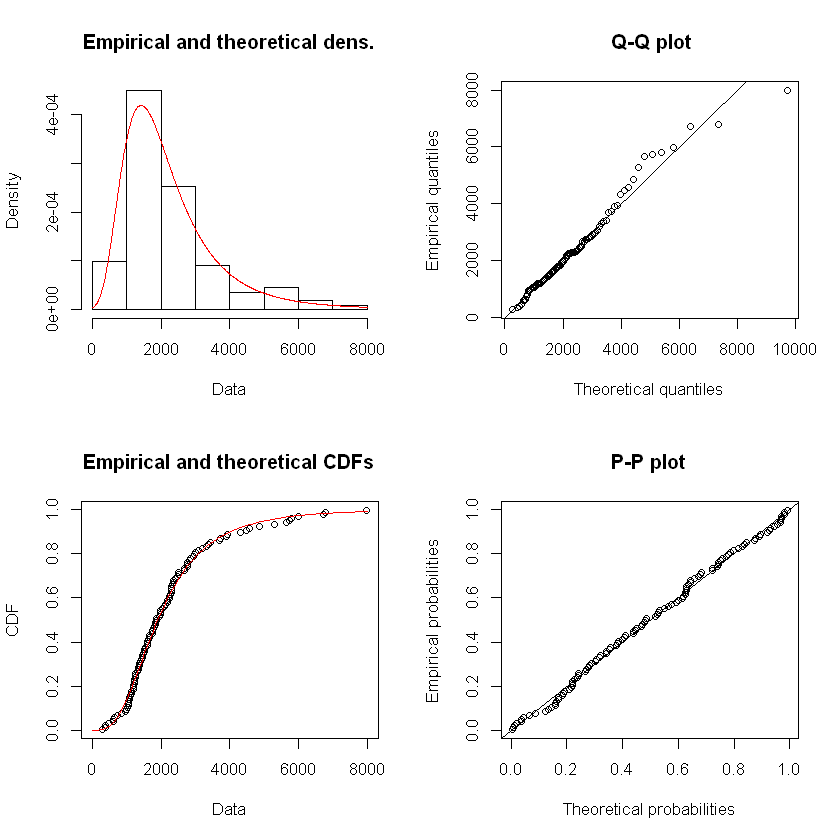

[1] "Environment"
[1] "GFDL"


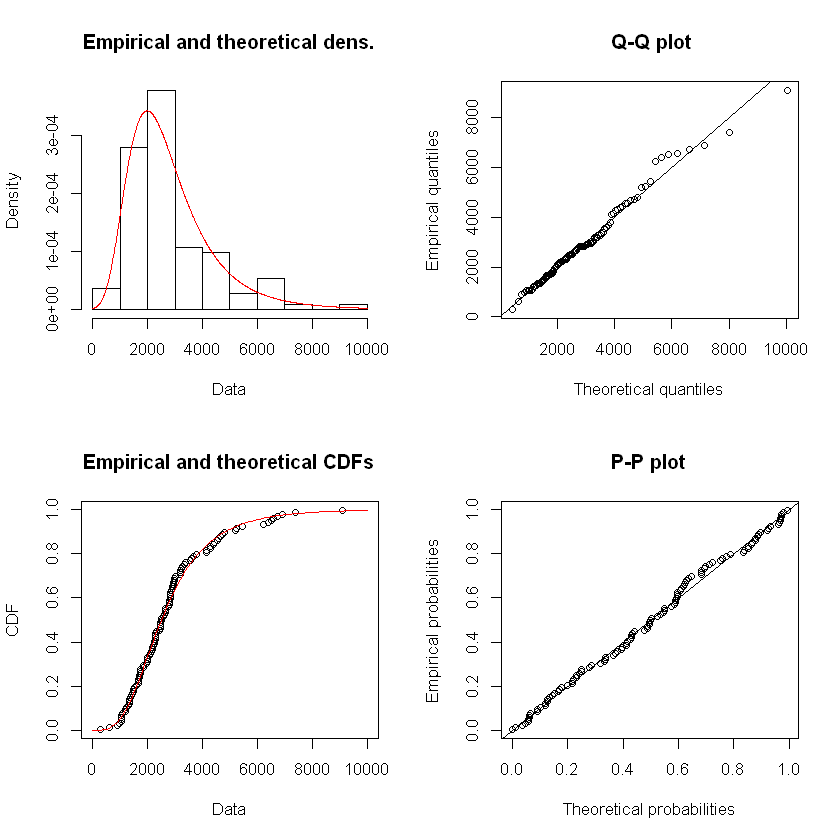

[1] "CCSM"


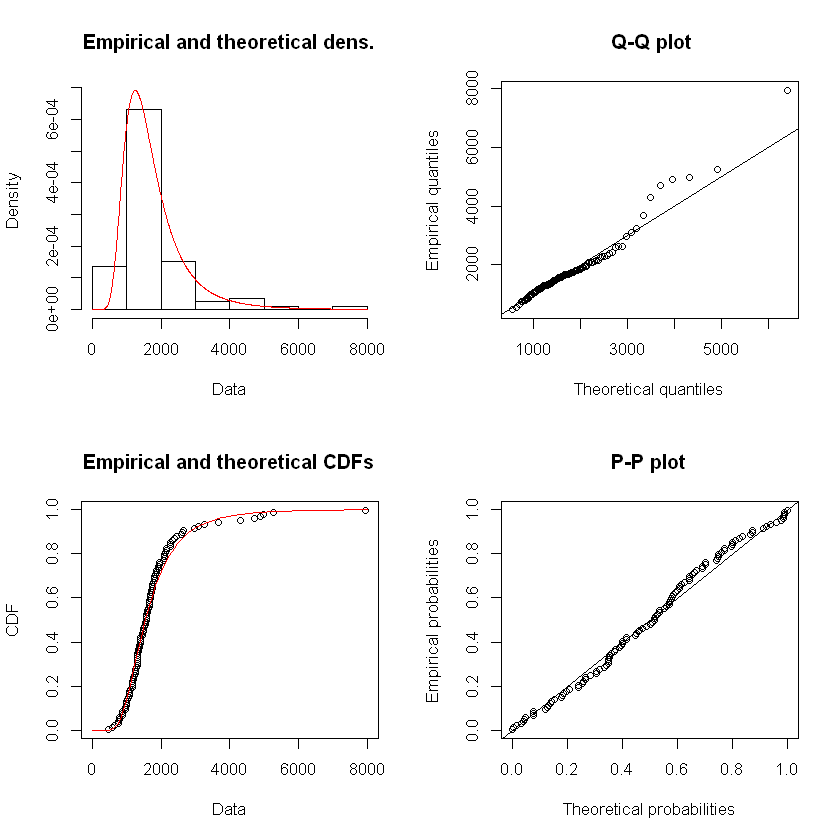

[1] "Recession"
[1] "GFDL"


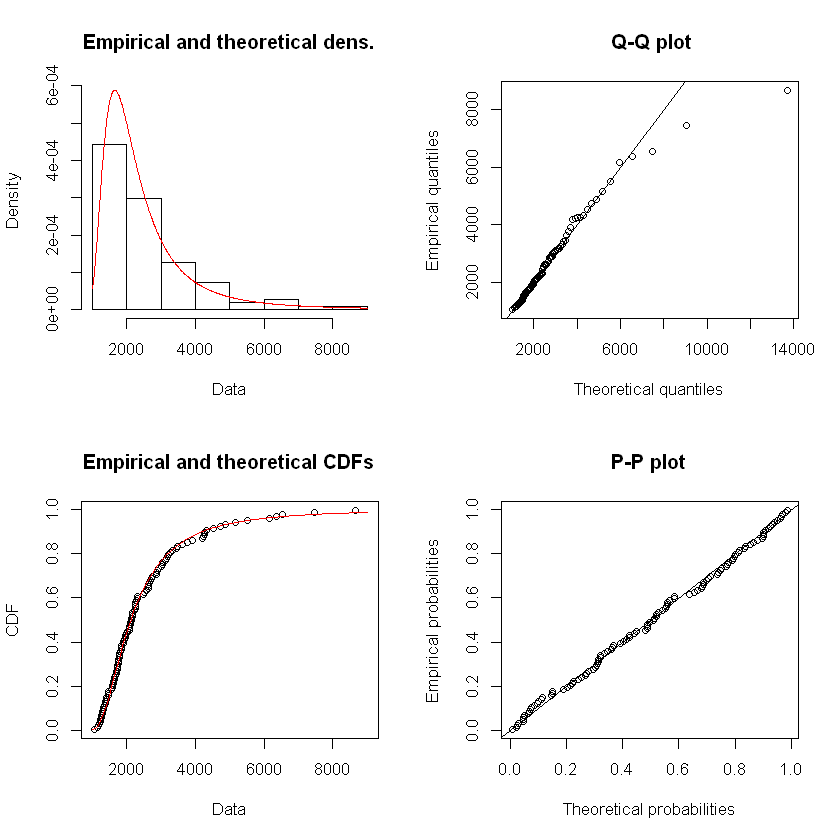

[1] "CCSM"


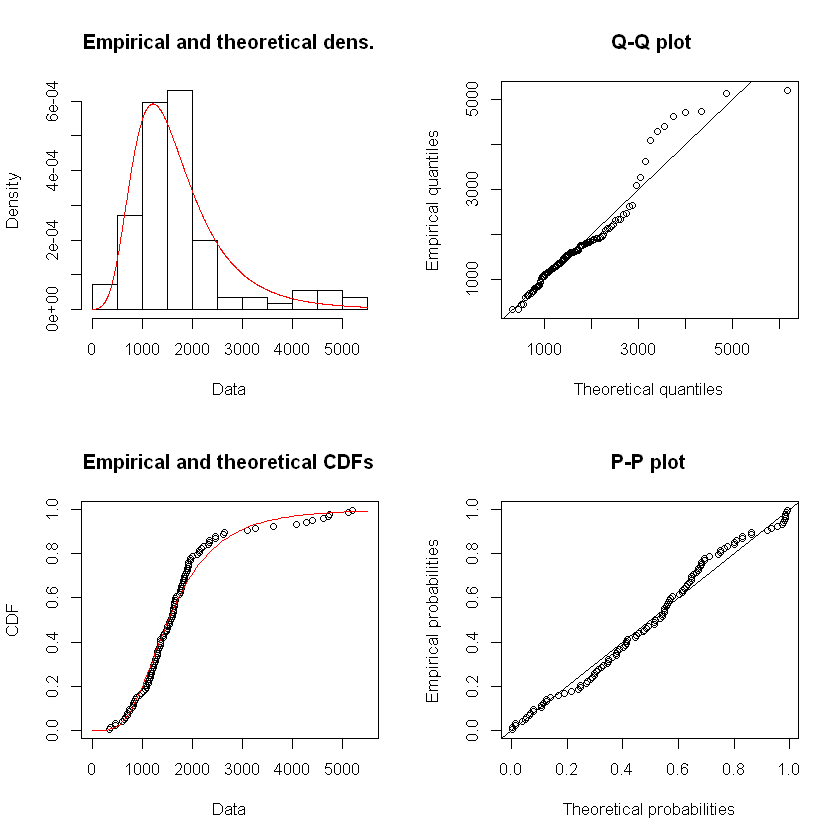

[1] "Cotton"
[1] "GFDL"


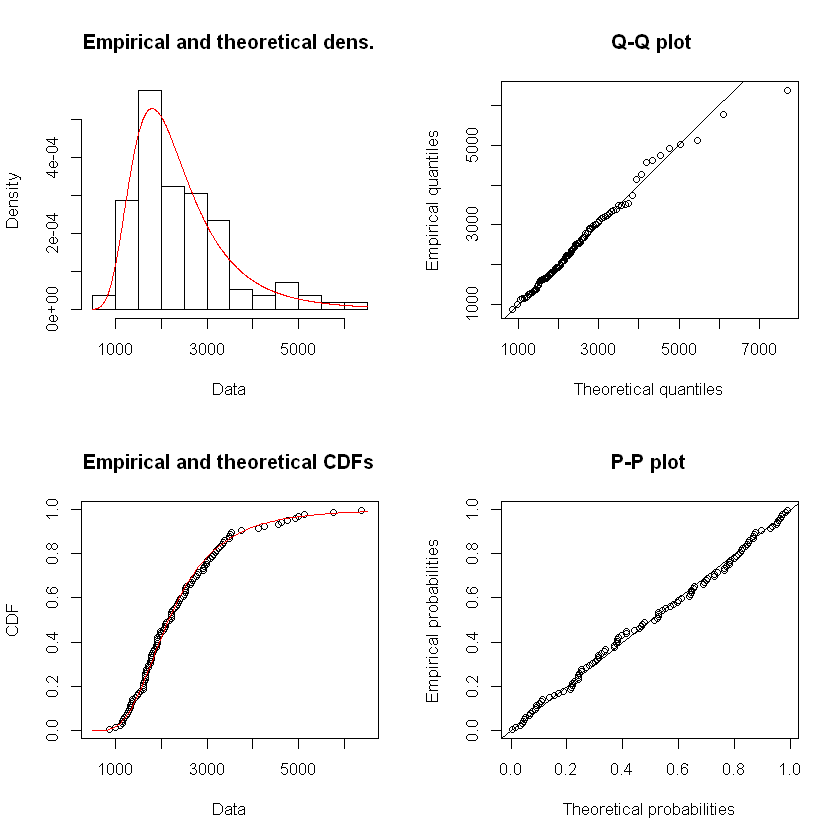

[1] "CCSM"


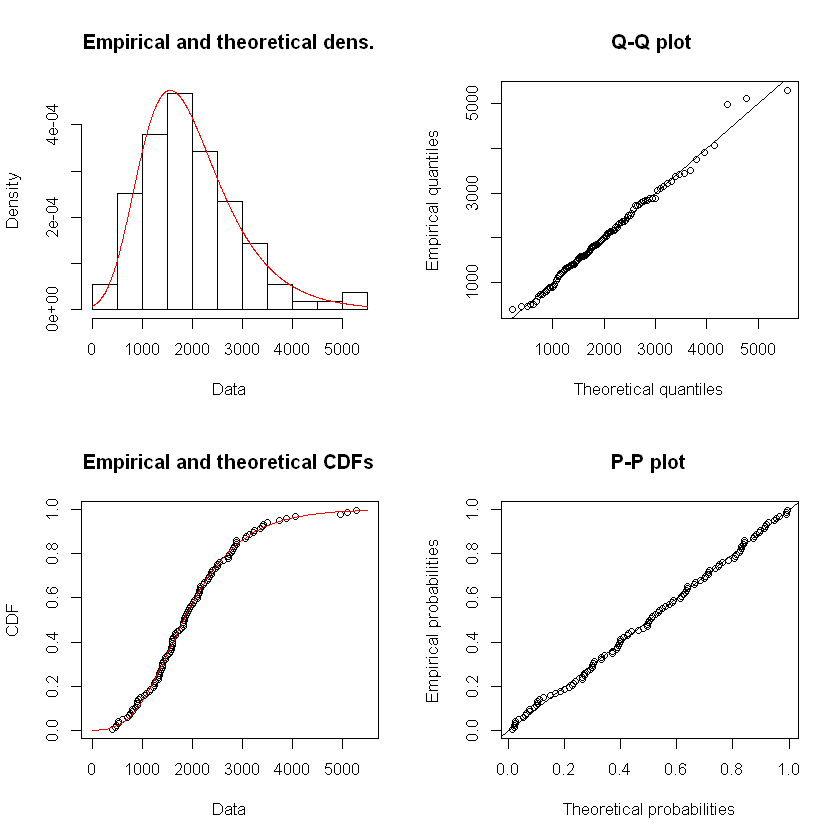

[1] "Sugar"
[1] "GFDL"


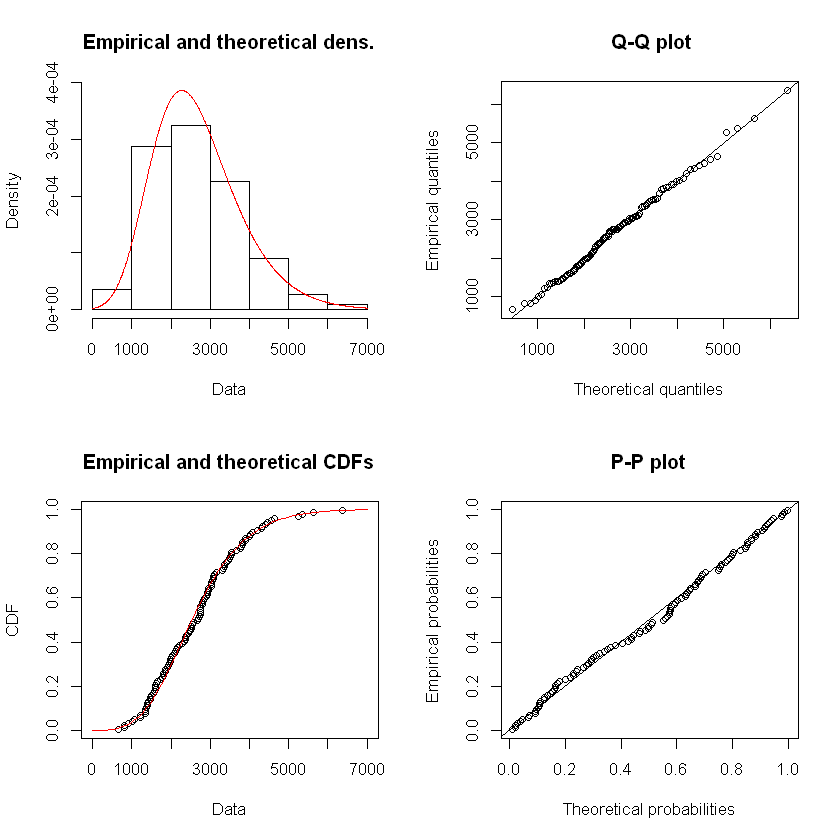

[1] "CCSM"


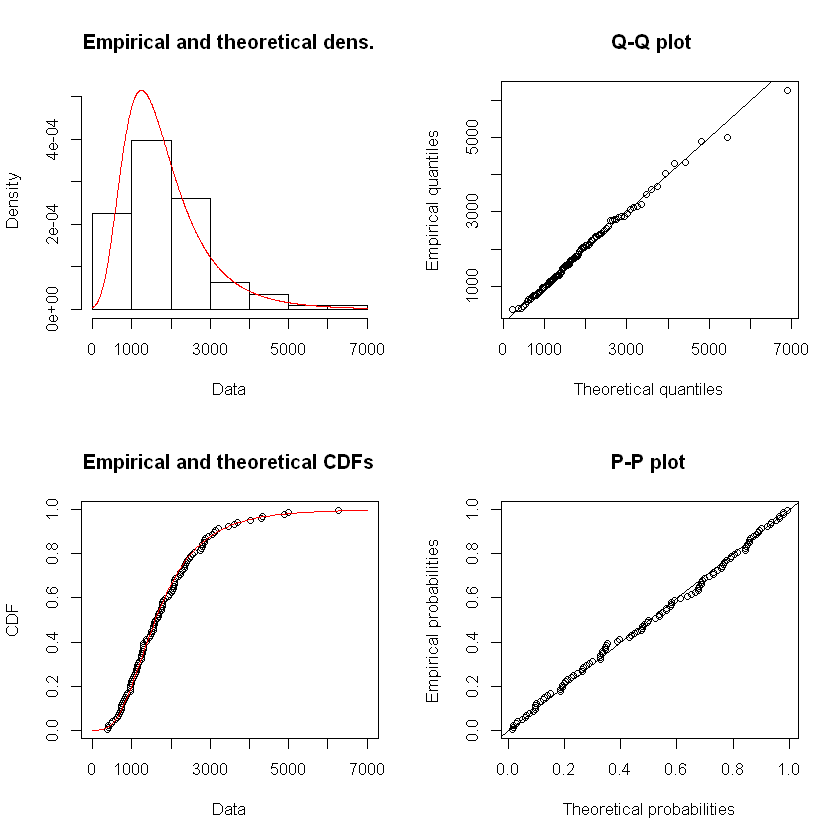

[1] "Uncontrolled"
[1] "GFDL"


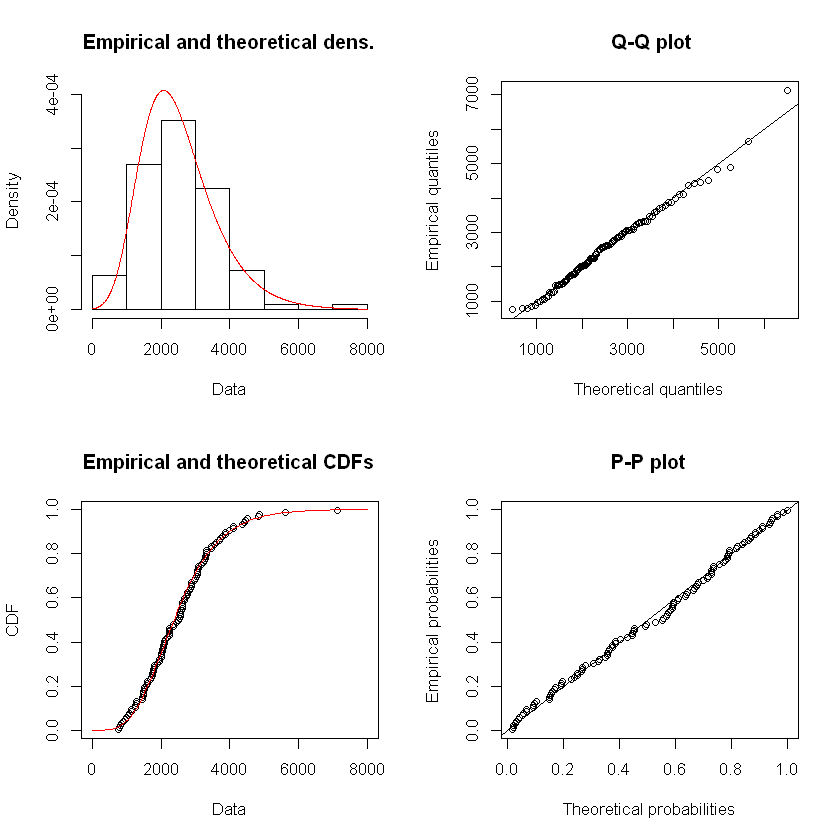

[1] "CCSM"


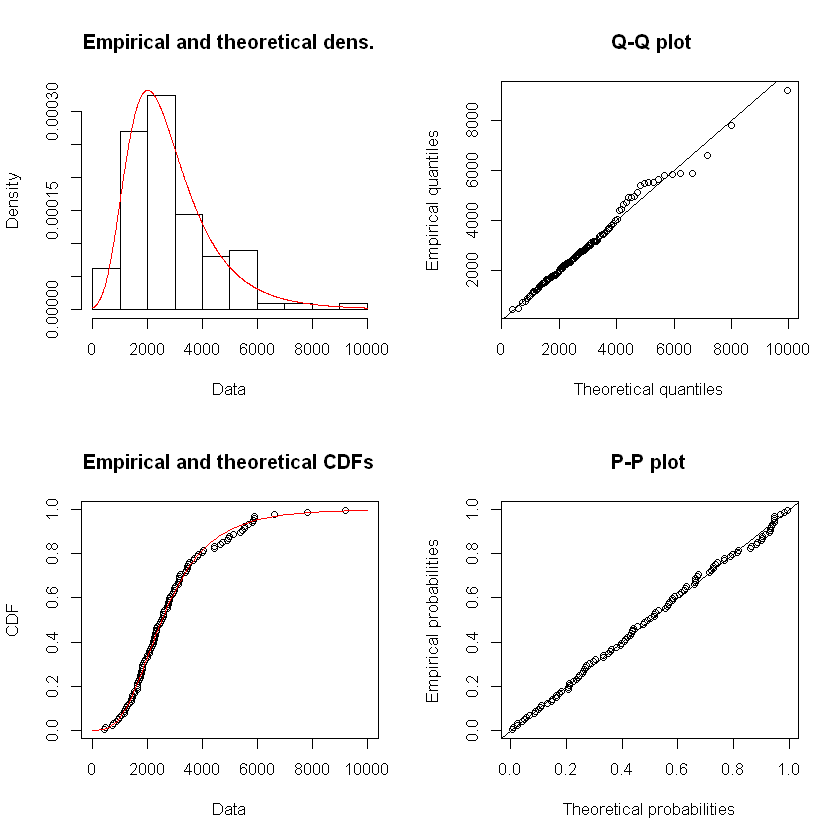

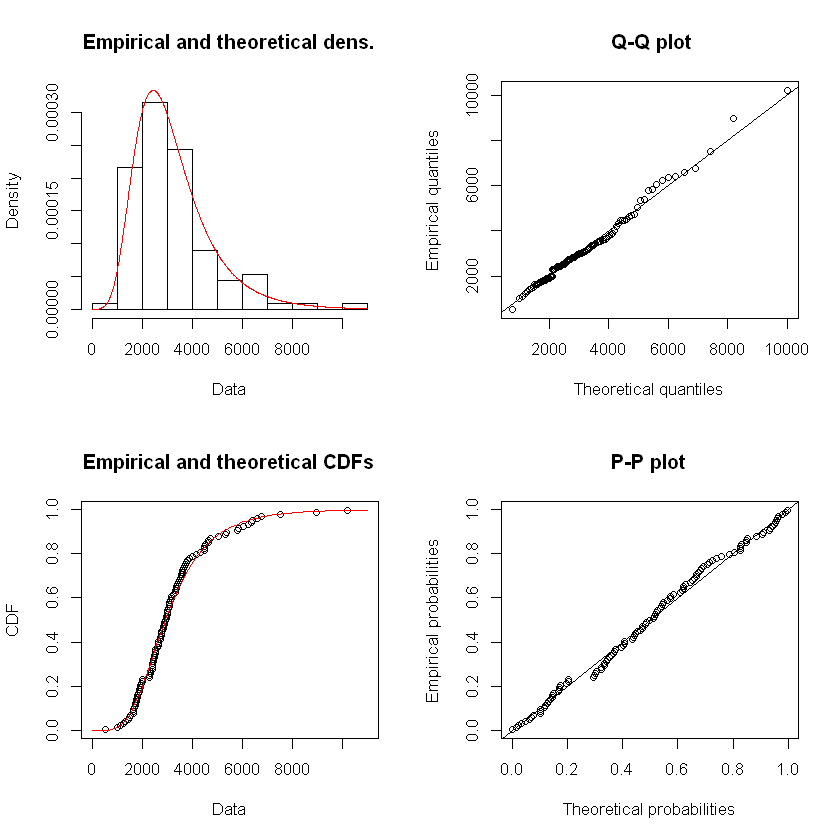

In [35]:
GFDL_MLE = list()
CCSM_MLE = list()

for(o in Objectives){
    print(o)
    print("GFDL")
    GFDL_MLE[[o]] = fitdist(GFDL_maxQ[[o]], "gev", 
                           start=list(shape=GFDL_params[[o]]$kappa,
                                     scale = GFDL_params[[o]]$alpha,
                                     location = GFDL_params[[o]]$xi),
                           method="mle")
    plot(GFDL_MLE[[o]])
    print("CCSM")
    CCSM_MLE[[o]] = fitdist(as.numeric(unlist(CCSM_maxQ[[o]])), "gev", 
                       start=list(shape=CCSM_params[[o]]$kappa,
                                 scale = CCSM_params[[o]]$alpha,
                                 location = CCSM_params[[o]]$xi),
                       method="mle")
    plot(CCSM_MLE[[o]])

}

In [36]:
GFDL_MLE$Hydropower$estimate[2]

scale 
890.4878

In [37]:
hydro.df.stationary = data.frame(matrix(ncol=5, nrow=0))
env.df.stationary = data.frame(matrix(ncol=5, nrow=0))
rec.df.stationary = data.frame(matrix(ncol=5, nrow=0))
sug.df.stationary = data.frame(matrix(ncol=5, nrow=0))
cot.df.stationary = data.frame(matrix(ncol=5, nrow=0))
uc.df.stationary = data.frame(matrix(ncol=5, nrow=0))

In [38]:
createDataFrameStationary = function(o, df){
    y = o
    shape = GFDL_MLE[[o]]$estimate[1]
    scale = GFDL_MLE[[o]]$estimate[2]
    loc = GFDL_MLE[[o]]$estimate[3]
    GFDLvalues = calcReturns(shape, scale, loc)
    shape = CCSM_MLE[[o]]$estimate[1]
    scale = CCSM_MLE[[o]]$estimate[2]
    loc = CCSM_MLE[[o]]$estimate[3]
    CCSMvalues = calcReturns(shape, scale, loc)

    values = c(y, GFDLvalues$q100, GFDLvalues$q500, CCSMvalues$q100, CCSMvalues$q500)
    df = rbind(df, values)
        
}
    colnames(df) = c("Obj", "GFDL.q100", "GFDL.q500", "CCSM.q100", "CCSM.q500")
    return(df)
}

In [39]:
hydro.df.stationary  = createDataFrameStationary('Hydropower', hydro.df.stationary,years)
env.df.stationary = createDataFrameStationary('Environment', env.df.stationary,years)
rec.df.stationary = createDataFrameStationary('Recession', rec.df.stationary,years)
sug.df.stationary = createDataFrameStationary('Sugar', sug.df.stationary,years)
cot.df.stationary = createDataFrameStationary('Cotton', cot.df.stationary,years)
uc.df.stationary = createDataFrameStationary('Uncontrolled', uc.df.stationary,years)


In [40]:
hydro.df.stationary

Year,GFDL.q100,GFDL.q500,CCSM.q100,CCSM.q500
2000,7957.526,11801.16,8537.536,11674.97
2025,7957.526,11801.16,8537.536,11674.97
2050,7957.526,11801.16,8537.536,11674.97
2075,7957.526,11801.16,8537.536,11674.97
2099,7957.526,11801.16,8537.536,11674.97


In [41]:
env.df.stationary

Year,GFDL.q100,GFDL.q500,CCSM.q100,CCSM.q500
2000,5293.095,7720.637,10141.41,18602.28
2025,5293.095,7720.637,10141.41,18602.28
2050,5293.095,7720.637,10141.41,18602.28
2075,5293.095,7720.637,10141.41,18602.28
2099,5293.095,7720.637,10141.41,18602.28


In [42]:
rec.df.stationary

Year,GFDL.q100,GFDL.q500,CCSM.q100,CCSM.q500
2000,5209.938,7233.822,6523.87,9045.39
2025,5209.938,7233.822,6523.87,9045.39
2050,5209.938,7233.822,6523.87,9045.39
2075,5209.938,7233.822,6523.87,9045.39
2099,5209.938,7233.822,6523.87,9045.39


In [43]:
sug.df.stationary

Year,GFDL.q100,GFDL.q500,CCSM.q100,CCSM.q500
2000,5808.158,8095.765,5892.022,7108.275
2025,5808.158,8095.765,5892.022,7108.275
2050,5808.158,8095.765,5892.022,7108.275
2075,5808.158,8095.765,5892.022,7108.275
2099,5808.158,8095.765,5892.022,7108.275


In [44]:
cot.df.stationary

Year,GFDL.q100,GFDL.q500,CCSM.q100,CCSM.q500
2000,4988.304,6140.573,5849.643,6839.75
2025,4988.304,6140.573,5849.643,6839.75
2050,4988.304,6140.573,5849.643,6839.75
2075,4988.304,6140.573,5849.643,6839.75
2099,4988.304,6140.573,5849.643,6839.75


In [45]:
uc.df.stationary

Year,GFDL.q100,GFDL.q500,CCSM.q100,CCSM.q500
2000,8518.314,11512.2,8678.516,11443.33
2025,8518.314,11512.2,8678.516,11443.33
2050,8518.314,11512.2,8678.516,11443.33
2075,8518.314,11512.2,8678.516,11443.33
2099,8518.314,11512.2,8678.516,11443.33


## Stationary and only over historical

In [46]:
GFDL_hist = GFDL_maxQ[which(GFDL_maxQ$Year < 2019),]
CCSM_hist = CCSM_maxQ[which(CCSM_maxQ$Year < 2019),]

In [47]:
GFDL_params = list()
CCSM_params = list()

for(o in Objectives){
    GFDL_params[[o]] = gevMOM(as.numeric(unlist(GFDL_hist[o])))
    CCSM_params[[o]] = gevMOM(as.numeric(unlist(CCSM_hist[o])))

}

[1] "Hydropower"
[1] "GFDL"
[1] "CCSM"
[1] "Environment"
[1] "GFDL"


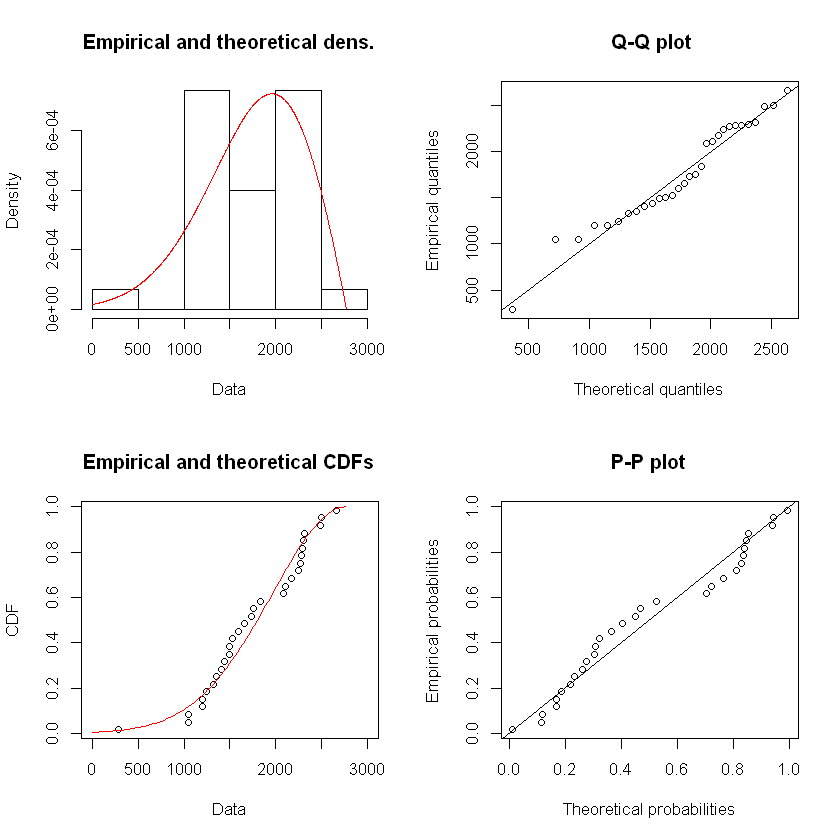

[1] "CCSM"
[1] "Recession"
[1] "GFDL"


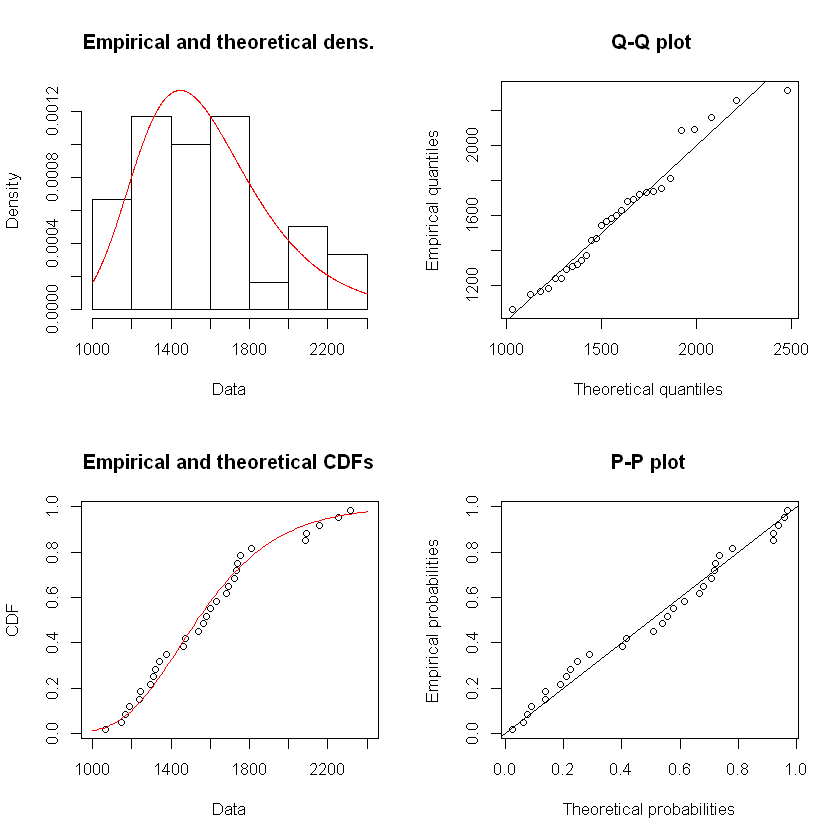

[1] "CCSM"
[1] "Cotton"
[1] "GFDL"


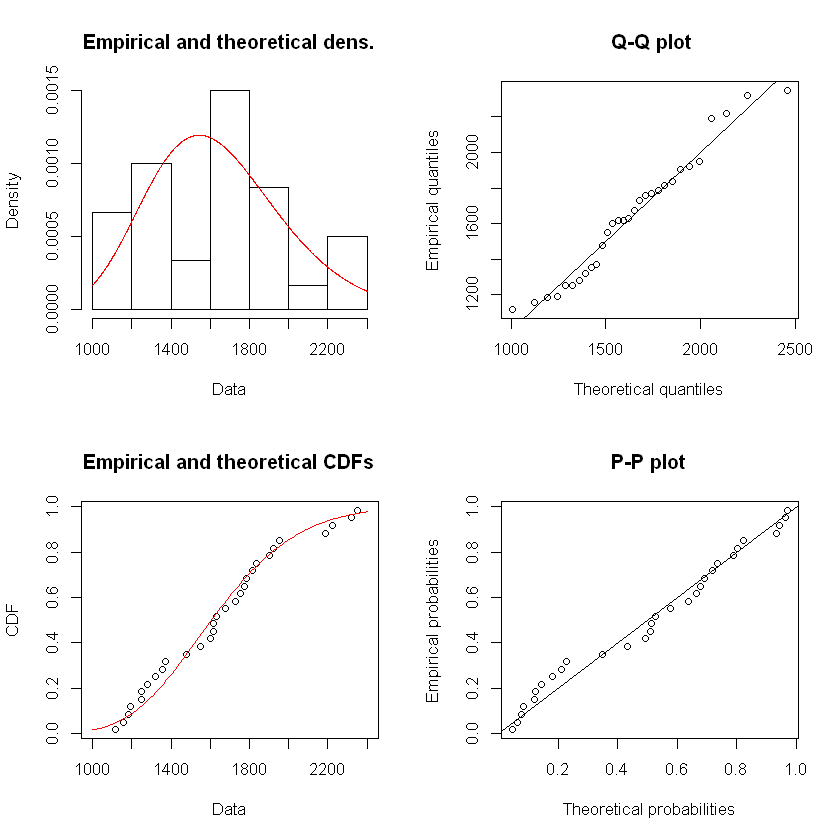

[1] "CCSM"
[1] "Sugar"
[1] "GFDL"


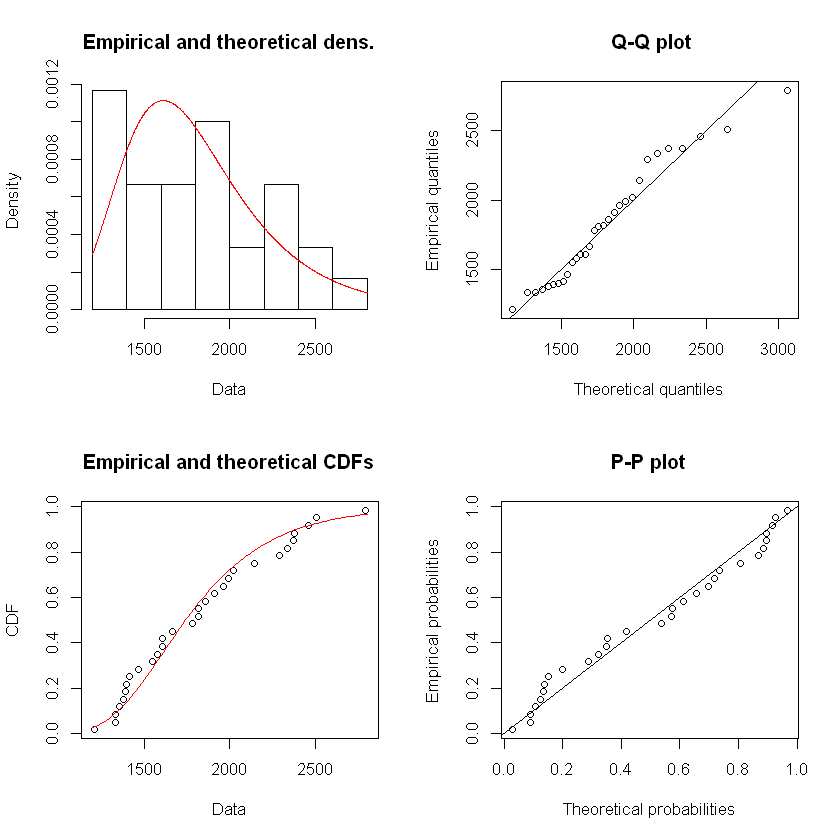

[1] "CCSM"
[1] "Uncontrolled"
[1] "GFDL"


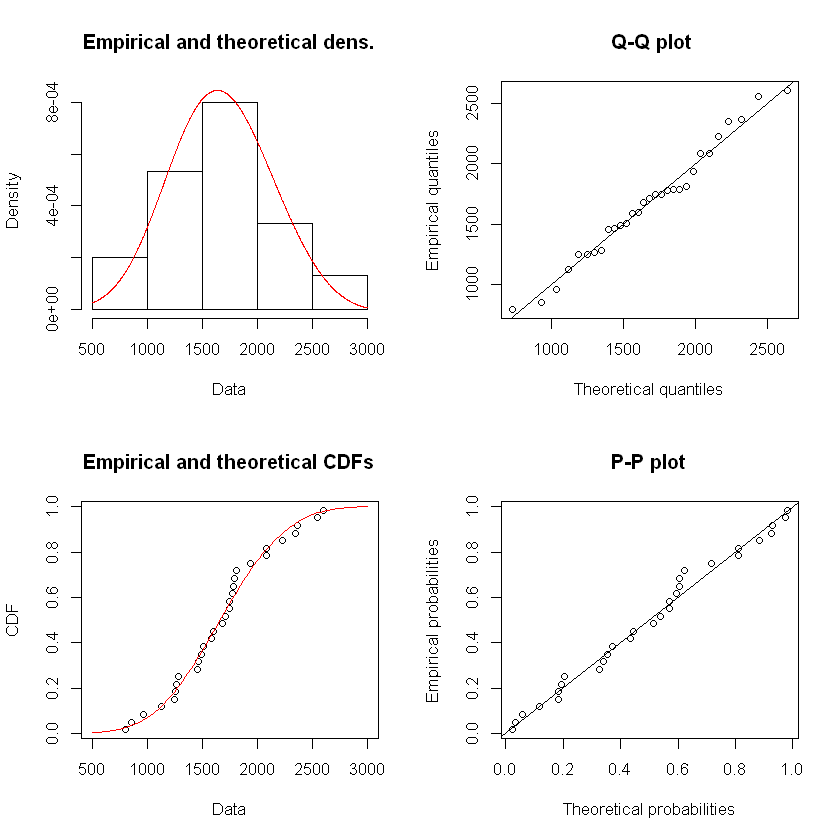

[1] "CCSM"


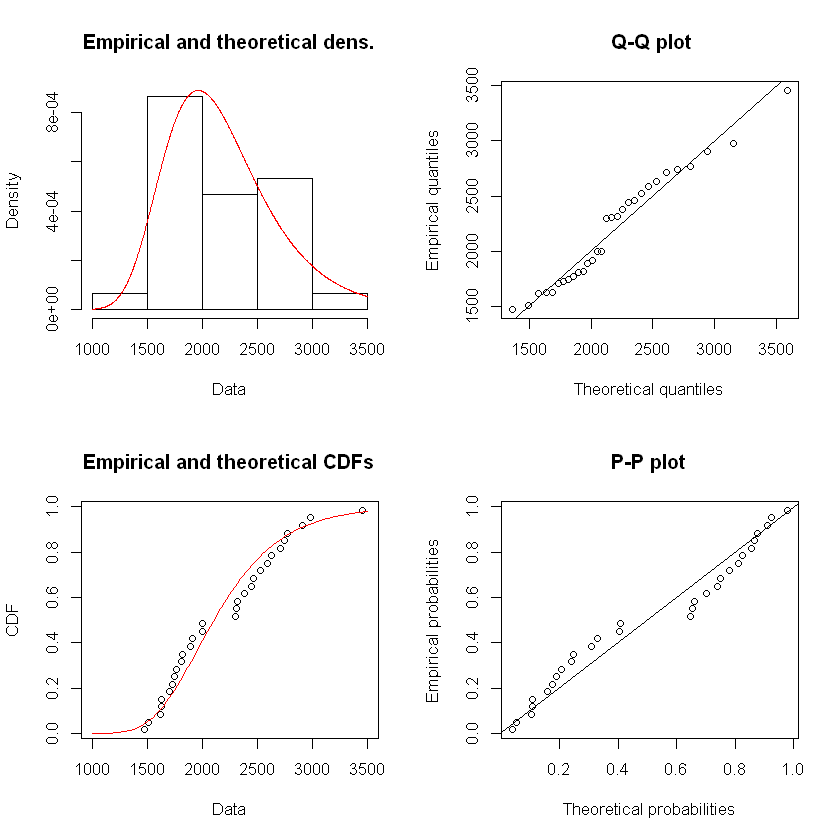

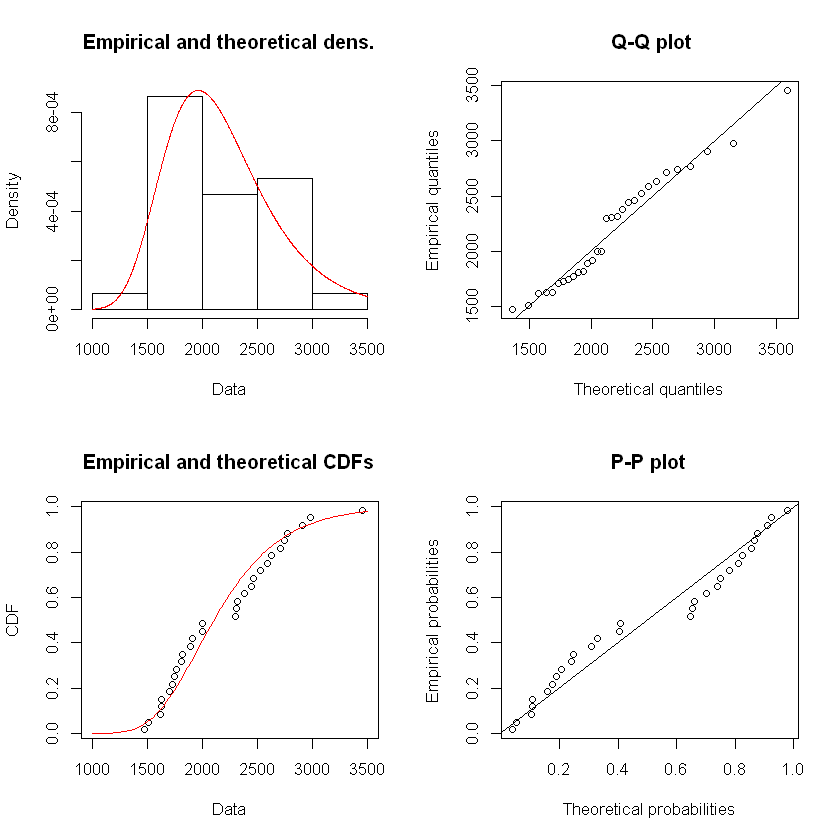

In [48]:
GFDL_MLE = list()
CCSM_MLE = list()

for(o in Objectives){
    print(o)
    print("GFDL")
    GFDL_MLE[[o]] = fitdist(GFDL_hist[[o]], "gev", 
                           start=list(shape=GFDL_params[[o]]$kappa,
                                     scale = GFDL_params[[o]]$alpha,
                                     location = GFDL_params[[o]]$xi),
                           method="mle")
    plot(GFDL_MLE[[o]])
    print("CCSM")
    CCSM_MLE[[o]] = fitdist(as.numeric(unlist(CCSM_hist[[o]])), "gev", 
                       start=list(shape=CCSM_params[[o]]$kappa,
                                 scale = CCSM_params[[o]]$alpha,
                                 location = CCSM_params[[o]]$xi),
                       method="mle")
    plot(CCSM_MLE[[o]])

}

In [49]:
hydro.df.stationary.hist = data.frame(matrix(ncol=5, nrow=0))
env.df.stationary.hist = data.frame(matrix(ncol=5, nrow=0))
rec.df.stationary.hist = data.frame(matrix(ncol=5, nrow=0))
sug.df.stationary.hist = data.frame(matrix(ncol=5, nrow=0))
cot.df.stationary.hist = data.frame(matrix(ncol=5, nrow=0))
uc.df.stationary.hist = data.frame(matrix(ncol=5, nrow=0))

In [50]:
hydro.df.stationary.hist  = createDataFrameStationary('Hydropower', hydro.df.stationary.hist,years)
env.df.stationary.hist = createDataFrameStationary('Environment', env.df.stationary.hist,years)
rec.df.stationary.hist = createDataFrameStationary('Recession', rec.df.stationary.hist,years)
sug.df.stationary.hist = createDataFrameStationary('Sugar', sug.df.stationary.hist,years)
cot.df.stationary.hist = createDataFrameStationary('Cotton', cot.df.stationary.hist,years)
uc.df.stationary.hist = createDataFrameStationary('Uncontrolled', uc.df.stationary.hist,years)


In [51]:
hydro.df.stationary.hist

Year,GFDL.q100,GFDL.q500,CCSM.q100,CCSM.q500
2000,2661.563,2724.191,2661.563,2724.191
2025,2661.563,2724.191,2661.563,2724.191
2050,2661.563,2724.191,2661.563,2724.191
2075,2661.563,2724.191,2661.563,2724.191
2099,2661.563,2724.191,2661.563,2724.191


In [52]:
env.df.stationary.hist

Year,GFDL.q100,GFDL.q500,CCSM.q100,CCSM.q500
2000,2594.154,2949.529,2594.154,2949.529
2025,2594.154,2949.529,2594.154,2949.529
2050,2594.154,2949.529,2594.154,2949.529
2075,2594.154,2949.529,2594.154,2949.529
2099,2594.154,2949.529,2594.154,2949.529


In [53]:
rec.df.stationary.hist

Year,GFDL.q100,GFDL.q500,CCSM.q100,CCSM.q500
2000,2543.001,2773.706,2543.001,2773.706
2025,2543.001,2773.706,2543.001,2773.706
2050,2543.001,2773.706,2543.001,2773.706
2075,2543.001,2773.706,2543.001,2773.706
2099,2543.001,2773.706,2543.001,2773.706


In [54]:
sug.df.stationary.hist

Year,GFDL.q100,GFDL.q500,CCSM.q100,CCSM.q500
2000,2708.81,2885.593,2708.81,2885.593
2025,2708.81,2885.593,2708.81,2885.593
2050,2708.81,2885.593,2708.81,2885.593
2075,2708.81,2885.593,2708.81,2885.593
2099,2708.81,2885.593,2708.81,2885.593


In [55]:
cot.df.stationary.hist

Year,GFDL.q100,GFDL.q500,CCSM.q100,CCSM.q500
2000,3253.084,3880.934,3253.084,3880.934
2025,3253.084,3880.934,3253.084,3880.934
2050,3253.084,3880.934,3253.084,3880.934
2075,3253.084,3880.934,3253.084,3880.934
2099,3253.084,3880.934,3253.084,3880.934


In [56]:
uc.df.stationary.hist

Year,GFDL.q100,GFDL.q500,CCSM.q100,CCSM.q500
2000,3782.929,4389.98,3782.929,4389.98
2025,3782.929,4389.98,3782.929,4389.98
2050,3782.929,4389.98,3782.929,4389.98
2075,3782.929,4389.98,3782.929,4389.98
2099,3782.929,4389.98,3782.929,4389.98
